In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 35s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [20]:
def plot_sample(X,y,index):
    plt.figure(figsize=(12,5))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

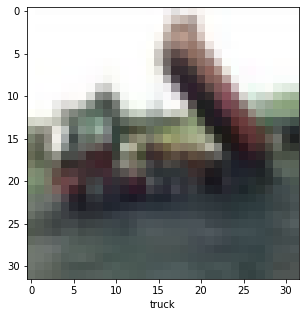

In [21]:
plot_sample(X_train,y_train,2)

In [22]:
X_train = X_train/255
X_test = X_test/255

In [23]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 75s 48ms/step - loss: 1.8148 - accuracy: 0.3532
Epoch 2/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.6261 - accuracy: 0.4256
Epoch 3/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5443 - accuracy: 0.4555
Epoch 4/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4828 - accuracy: 0.4776
Epoch 5/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4339 - accuracy: 0.4945


In [24]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.47      0.53      1000
           1       0.73      0.41      0.52      1000
           2       0.34      0.39      0.36      1000
           3       0.38      0.22      0.28      1000
           4       0.45      0.35      0.40      1000
           5       0.39      0.40      0.39      1000
           6       0.38      0.80      0.51      1000
           7       0.73      0.36      0.48      1000
           8       0.50      0.73      0.59      1000
           9       0.54      0.59      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



In [25]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [26]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4716 - accuracy: 0.4706
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1156 - accuracy: 0.6082
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9915 - accuracy: 0.6544
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9072 - accuracy: 0.6851
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8439 - accuracy: 0.7057
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7880 - accuracy: 0.7265
Epoch 7/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.7403 - accuracy: 0.7416
Epoch 8/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.6955 - accuracy: 0.7592
Epoch 9/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.6588 - accuracy: 0.7698
Epoch 10/10
1563/1563 [==============================] - 33s 21m

In [28]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9353 - accuracy: 0.6953


[0.9352911114692688, 0.6952999830245972]

In [29]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.1854929e-03, 1.1539044e-04, 1.7882114e-02, 8.1807387e-01,
        1.3562975e-03, 5.2833501e-02, 3.1490251e-04, 3.4441749e-04,
        1.0548487e-01, 4.0908018e-04],
       [8.9727510e-03, 6.6711503e-01, 4.9647806e-06, 1.4369645e-07,
        4.7272837e-07, 2.4149505e-09, 8.0562472e-09, 6.6247694e-06,
        3.2316542e-01, 7.3466747e-04],
       [1.9547732e-01, 2.9214939e-01, 1.1864830e-02, 2.0637183e-02,
        9.7342447e-04, 7.9118775e-04, 3.3941231e-04, 4.6017729e-03,
        4.0727520e-01, 6.5890282e-02],
       [8.8567901e-01, 4.9865739e-03, 5.3837826e-03, 5.1596301e-04,
        1.1526248e-02, 5.3831453e-05, 6.9043999e-05, 8.6736130e-05,
        9.1294199e-02, 4.0437558e-04],
       [2.3108623e-06, 4.4867804e-07, 1.5001141e-02, 1.2493793e-02,
        7.9488581e-01, 4.9163722e-03, 1.7269228e-01, 4.5097077e-06,
        3.3231577e-06, 3.9972811e-08]], dtype=float32)

In [30]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 4]

In [31]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [36]:
y_test.reshape(-1,)[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

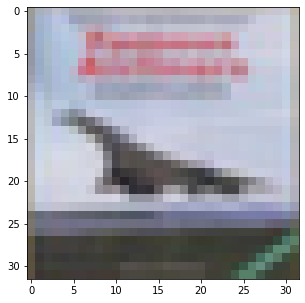

In [37]:
plot_sample(X_test, y_test,3)

In [38]:
print("Classification report: \n", classification_report(y_test,y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.67      0.80      0.73      1000
           1       0.80      0.83      0.81      1000
           2       0.67      0.55      0.60      1000
           3       0.58      0.43      0.49      1000
           4       0.63      0.66      0.64      1000
           5       0.54      0.65      0.59      1000
           6       0.80      0.74      0.77      1000
           7       0.69      0.77      0.73      1000
           8       0.79      0.81      0.80      1000
           9       0.80      0.71      0.75      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

